# Explorative Korpusanalyse des annotierten Datensatzes

## Vorbereitung

Daten einlesen

In [1]:
import pandas as pd
import nltk
import spacy
from collections import Counter
from spacy.tokens import Doc
from tqdm.notebook import tqdm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
nlp = spacy.load('de_core_news_sm')

In [3]:
tweets_annotiert = pd.read_excel('./data/tweets_annotiert.xlsx')
accounts_annotiert = pd.read_excel('./data/accounts_annotiert.xlsx')

In [4]:
def update_astype_tweets(df):
    df['tweet_text'] = df['tweet_text'].astype(str)
    df['tweet_text'] = df['tweet_text'].replace('-998', '')
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].astype(str)
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].replace('-998', '')
    df['zitat_text'] = df['zitat_text'].astype(str)
    df['zitat_text'] = df['zitat_text'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

def update_astype_bios(df):
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

In [5]:
update_astype_tweets(tweets_annotiert)
update_astype_bios(accounts_annotiert)

Laden der Spacy Docs

In [6]:
def load_spacy_docs_tweets(df, name):
    tweet_doc = []
    retweet_doc = []
    zitat_doc = []
    for index, row in df.iterrows():
        filename_tweet = "tweet_" + str(index).replace(" ", "") + ".txt"
        tweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/tweets/{filename_tweet}"))

        filename_retweet = "retweet_" + str(index).replace(" ", "") + ".txt"
        retweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/retweets/{filename_retweet}"))

        filename_zitat = "zitat_" + str(index).replace(" ", "") + ".txt"
        zitat_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/zitat_tweets/{filename_zitat}"))
  
    # add the list of spacy docs as a new column to the dataframe
    df[f"spacy_doc_tweets"] = tweet_doc
    df[f"spacy_doc_retweets"] = retweet_doc
    df[f"spacy_doc_zitat_tweets"] = zitat_doc

In [7]:
def load_spacy_docs_bios(df, name):
    spacy_doc = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        filename_bio = "bio_" + str(index).replace(" ", "") + ".txt"
        spacy_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/{filename_bio}"))
    df[f"spacy_doc_bios"] = spacy_doc

In [8]:
load_spacy_docs_tweets(tweets_annotiert, 'tweets_annotiert')
load_spacy_docs_bios(accounts_annotiert, 'bios_annotiert')

  0%|          | 0/10818 [00:00<?, ?it/s]

In [9]:
tweets_annotiert.head()

tweet_date_create tweet_creator_atName        tweet_creator_screenName  \
0 2022-12-14 20:19:48       SuchtiSchleich                          Steffk   
1 2022-12-14 20:20:26             printi71  printi007 aka Dr. Canceloretta   
2 2022-12-14 20:20:34            4linblue1                       4linblue🔱   
3 2022-12-14 20:21:01       HartwigKmmerle                      Ho finito!   
4 2022-12-14 20:21:11             printi71  printi007 aka Dr. Canceloretta   

                                   tweet_creator_bio  \
0                                                      
1                            😷 Infektionsverweigerin   
2  Wenn ein Kopf und ein Buch zusammen stoßen und...   
3  + jedem Anfang wohnt ein Zauber inne, der uns ...   
4                            😷 Infektionsverweigerin   

                                          tweet_text  \
0                                                      
1                                                      
2  @MartinZenker @JochenBittner Hier in der Famil...   
3                                                      
4                                                      

                        retweet_text_retweeted_tweet  \
0  Es scheint so weit weg, so surreal, aber es fe...   
1  @mecfsbuch @nervensystemck #KleinschnitzRaussc...   
2                                                      
3  Forschung an einem faszinierenden Potenzialthe...   
4          #KleinschnitzRausschmiss sollte trenden!    

                                          zitat_text    gender institution  \
0                                                     männlich      Person   
1  #KleinschnitzRausschmiss bitte jetzt @Uniklini...  weiblich      Person   
2                                                       unklar      unklar   
3                                                     männlich      Person   
4  #KleinschnitzRausschmiss bitte jetzt @Uniklini...  weiblich      Person   

  author_category                                   spacy_doc_tweets  \
0          unklar                                                 ()   
1          unklar                                                 ()   
2          unklar  (@MartinZenker, @JochenBittner, Hier, in, der,...   
3          unklar                                                 ()   
4          unklar                                                 ()   

                                  spacy_doc_retweets  \
0  (Es, scheint, so, weit, weg, ,, so, surreal, ,...   
1  (@mecfsbuch, @nervensystemck, #, KleinschnitzR...   
2                                                 ()   
3  (Forschung, an, einem, faszinierenden, Potenzi...   
4   (#, KleinschnitzRausschmiss, sollte, trenden, !)   

                              spacy_doc_zitat_tweets  
0                                                 ()  
1  (#, KleinschnitzRausschmiss, bitte, jetzt, @Un...  
2                                                 ()  
3                                                 ()  
4  (#, KleinschnitzRausschmiss, bitte, jetzt, @Un...

In [10]:
accounts_annotiert.head()

tweet_creator_atName        tweet_creator_screenName  \
0        GreenFire_93D                GreenFire_Dancer   
1      lisacarstensen5  @lisacarstensen@toot.community   
2            Mag2012Ge   maggie🇪🇺 #StandWithUkraine 🇺🇦   
3        MailanderUlla                  Ulla Mailänder   
4           HannesKopf                     Hannes Kopf   

                                   tweet_creator_bio    gender institution  \
0                                                       unklar      unklar   
1  Social Scientist, she/her, Global Political Ec...  weiblich      Person   
2  #blacklivesmatter #humanrights #animalrights #...  weiblich      Person   
3  Mutter eines erwachsenen Sohnes mit ME/CFS und...  weiblich      Person   
4                                                     männlich      Person   

      author_category                                     spacy_doc_bios  
0              unklar                                                 ()  
1  Wissenschaftler*in  (Social, Scientist, ,, she, /, her, ,, Global,...  
2              unklar  (#, blacklivesmatter, #, humanrights, #, anima...  
3              unklar  (Mutter, eines, erwachsenen, Sohnes, mit, ME, ...  
4              unklar                                                 ()

## Statistiken

### Verhältnis Tweets - Retweets - Zitierte Tweets

In [11]:
def count_tweet_type(df):
    count_tweets = (df['spacy_doc_tweets'].apply(lambda doc: len(doc) > 0)).sum() 
                     
    count_retweets = (df['spacy_doc_retweets'].apply(lambda doc: len(doc) > 0)).sum()

    count_zitat =  (df['spacy_doc_zitat_tweets'].apply(lambda doc: len(doc) > 0)).sum()
    
    # Gesamtanzahl der Zeilen im DataFrame
    total_rows = len(df)

    # Berechnung der relativen Häufigkeiten
    relative_tweets = count_tweets / total_rows
    relative_retweets = count_retweets / total_rows
    relative_zitat = count_zitat / total_rows

    print(f"Anzahl Tweets: {count_tweets} ({relative_tweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl Retweets: {count_retweets} ({relative_retweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl zitierte Tweets: {count_zitat} ({relative_zitat:.2%} der Gesamtanzahl)")

In [12]:
count_tweet_type(tweets_annotiert)

Anzahl Tweets: 10476 (40.74% der Gesamtanzahl)
Anzahl Retweets: 15238 (59.26% der Gesamtanzahl)
Anzahl zitierte Tweets: 5344 (20.78% der Gesamtanzahl)


### Verteilung der Accounts

In [13]:
accounts_annotiert.shape

(10818, 7)

In [14]:
institution_counts = accounts_annotiert['institution'].value_counts()
institution_percentages = (institution_counts / institution_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Accounts nach Institution:")
print(institution_counts)
print("\nProzentsatz der Accounts nach Institution:")
print(institution_percentages)

Anzahl der Accounts nach Institution:
institution
Person                    7859
unklar                    2605
Forschungsinstitution      229
Nachrichtendienst           85
Universität/Hochschule      40
Name: count, dtype: int64

Prozentsatz der Accounts nach Institution:
institution
Person                    72.647439
unklar                    24.080237
Forschungsinstitution      2.116842
Nachrichtendienst          0.785727
Universität/Hochschule     0.369754
Name: count, dtype: float64


In [15]:
category_counts = accounts_annotiert['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Accounts nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Accounts nach Kategorie:")
print(category_percentages)

Anzahl der Accounts nach Kategorie:
author_category
unklar                                 9280
Wissenschaftler*in                      962
wissenschaftsnah                        456
Politiker*in                            108
Wissenschaftsnahe Politiker*in           11
Wissenschaftler*in und Politiker*in       1
Name: count, dtype: int64

Prozentsatz der Accounts nach Kategorie:
author_category
unklar                                 85.782954
Wissenschaftler*in                      8.892586
wissenschaftsnah                        4.215197
Politiker*in                            0.998336
Wissenschaftsnahe Politiker*in          0.101682
Wissenschaftler*in und Politiker*in     0.009244
Name: count, dtype: float64


In [16]:
gender_counts = accounts_annotiert[accounts_annotiert['institution'] == 'Person']['gender'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100

print("Anzahl der Accounts nach Gender:")
print(gender_counts)
print("\nProzentsatz der Accounts nach Gender:")
print(gender_percentages)

Anzahl der Accounts nach Gender:
gender
männlich     4401
weiblich     2470
unklar        889
non-binär      99
Name: count, dtype: int64

Prozentsatz der Accounts nach Gender:
gender
männlich     55.999491
weiblich     31.428935
unklar       11.311872
non-binär     1.259702
Name: count, dtype: float64


### Verteilung der Tweets

In [17]:
tweets_annotiert.shape

(25714, 13)

In [18]:
institution_counts = tweets_annotiert['institution'].value_counts()
institution_percentages = (institution_counts / institution_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Tweets nach Institution:")
print(institution_counts)
print("\nProzentsatz der Tweets nach Institution:")
print(institution_percentages)

Anzahl der Tweets nach Institution:
institution
Person                    18608
unklar                     6182
Forschungsinstitution       485
Nachrichtendienst           325
Universität/Hochschule      114
Name: count, dtype: int64

Prozentsatz der Tweets nach Institution:
institution
Person                    72.365249
unklar                    24.041378
Forschungsinstitution      1.886132
Nachrichtendienst          1.263903
Universität/Hochschule     0.443338
Name: count, dtype: float64


In [19]:
category_counts = tweets_annotiert['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Tweets nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Tweets nach Kategorie:")
print(category_percentages)

Anzahl der Tweets nach Kategorie:
author_category
unklar                                 22379
Wissenschaftler*in                      2026
wissenschaftsnah                        1093
Politiker*in                             185
Wissenschaftsnahe Politiker*in            27
Wissenschaftler*in und Politiker*in        4
Name: count, dtype: int64

Prozentsatz der Tweets nach Kategorie:
author_category
unklar                                 87.030411
Wissenschaftler*in                      7.878976
wissenschaftsnah                        4.250603
Politiker*in                            0.719452
Wissenschaftsnahe Politiker*in          0.105001
Wissenschaftler*in und Politiker*in     0.015556
Name: count, dtype: float64


In [20]:
gender_counts = tweets_annotiert[tweets_annotiert['institution'] == 'Person']['gender'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100

print("Anzahl der Tweets nach Gender:")
print(gender_counts)
print("\nProzentsatz der Tweets nach Gender:")
print(gender_percentages)

Anzahl der Tweets nach Gender:
gender
männlich     9648
weiblich     6552
unklar       2210
non-binär     198
Name: count, dtype: int64

Prozentsatz der Tweets nach Gender:
gender
männlich     51.848667
weiblich     35.210662
unklar       11.876612
non-binär     1.064058
Name: count, dtype: float64


### Token + Sentences

In [21]:
def get_token_sent_counts(df):
    result = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        token_counter = 0
        sentence_counter = 0
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            spacy_doc = row[f"spacy_doc_{name}"]
            # Überprüfe, ob das Spacy-Dokument nicht leer ist
            if len(spacy_doc) > 0:
                for sent in spacy_doc.sents:
                    sentence_counter += 1
                    for token in sent:
                        # Überprüfen Sie die Token-Eigenschaften für die Filterung
                        if not (token.is_punct or
                                token.is_space or
                                token.is_digit or
                                token.is_quote or
                                token.like_url or
                                token.like_email):
                            token_counter += 1
        result[name] = (token_counter, sentence_counter)
    return result


In [22]:
counts = get_token_sent_counts(tweets_annotiert)

  0%|          | 0/25714 [00:00<?, ?it/s]

  0%|          | 0/25714 [00:00<?, ?it/s]

  0%|          | 0/25714 [00:00<?, ?it/s]

In [23]:
data = {'Category': ['Tokens', 'Sentences'],
        'Tweets': [counts['tweets'][0], counts['tweets'][1]],
        'Retweets': [counts['retweets'][0], counts['retweets'][1]],
        'Zitierte Tweets': [counts['zitat_tweets'][0], counts['zitat_tweets'][1]],
       }

tok_sent = pd.DataFrame(data)
tok_sent

Category  Tweets  Retweets  Zitierte Tweets
0     Tokens  278076    463488           166761
1  Sentences   34404     54822            19104

In [24]:
def stats(counts, column, df):
    valid_rows = sum(1 for index, row in df.iterrows() if len(row[f"spacy_doc_{column}"]) > 0)
    mean_tok = counts[column][0] / valid_rows
    mean_sent = counts[column][1] / valid_rows
    tok_per_sent = counts[column][0] / counts[column][1]
    return [mean_tok, mean_sent, tok_per_sent]

In [25]:
data = {'Category': ['Mean Tokens per Tweet', 'Mean Sentences per Tweet', 'Tokens per Sentence'],
        'Tweets': stats(counts, 'tweets', tweets_annotiert) ,
        'Retweets': stats(counts, 'retweets', tweets_annotiert) ,
        'Zitierte Tweets': stats(counts, 'zitat_tweets', tweets_annotiert) ,
       }
tok_sent_stats = pd.DataFrame(data)
tok_sent_stats

Category     Tweets   Retweets  Zitierte Tweets
0     Mean Tokens per Tweet  26.544101  30.416590        31.205277
1  Mean Sentences per Tweet   3.284078   3.597716         3.574850
2       Tokens per Sentence   8.082665   8.454416         8.729114

#### Type-Token Verhältnis

Lemmas extrahieren

In [26]:
def get_lemmas(df):
    lemmas = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        lemmas[name] = []  # Initialisieren Sie die Liste für den Schlüssel 'name'
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            for token in row[f"spacy_doc_{name}"]:
                if not token.is_punct and \
                    not token.is_space and \
                    not token.is_bracket and \
                    not token.is_digit and \
                    not token.is_quote and \
                    not token.like_url and \
                    not token.like_email:
                    lemmas[name].append(token.lemma_)
    return lemmas

In [27]:
lemmas_tweets = get_lemmas(tweets_annotiert)

  0%|          | 0/25714 [00:00<?, ?it/s]

  0%|          | 0/25714 [00:00<?, ?it/s]

  0%|          | 0/25714 [00:00<?, ?it/s]

Type-Token-Ratio berechnen

In [28]:
from lexical_diversity import lex_div as ld

In [29]:
data = {'Category': ['Type Token Ratio'],
        'Tweets': ld.ttr(lemmas_tweets["tweets"]),
        'Retweets': ld.ttr(lemmas_tweets["retweets"]),
        'Zitierte Tweets': ld.ttr(lemmas_tweets["zitat_tweets"]),
       }
ttr = pd.DataFrame(data)
ttr

Category    Tweets  Retweets  Zitierte Tweets
0  Type Token Ratio  0.141241  0.048305         0.079944

#### Token per Bio

In [30]:
def calculate_token_stats(docs):
    num_tokens = [len(doc) for doc in docs]

    min_tokens = min(num_tokens)
    max_tokens = max(num_tokens)
    avg_tokens = sum(num_tokens) / len(num_tokens)

    return min_tokens, max_tokens, avg_tokens

min_tokens, max_tokens, avg_tokens = calculate_token_stats(accounts_annotiert['spacy_doc_bios'])

print("Minimal tokens in bio:", min_tokens)
print("Maximal tokens in bio:", max_tokens)
print("Durchschnittliche tokens in bio:", avg_tokens)

Minimal tokens in bio: 0
Maximal tokens in bio: 61
Durchschnittliche tokens in bio: 14.171473470142356


## Häufigste Wörter

### Tweets

#### WordCloud Funktion

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
def create_wordcloud(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=1500, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [33]:
def create_wordcloud_vertical(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=700, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Die häufigsten Wörter 1 - ohne Stoppwörter

In [34]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter
import string

In [35]:
def filter_tokens(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop 
            and not token.is_punct and not token.like_num]

In [36]:
def common_words1(df, name):
    words = []
    for doc in df[f"spacy_doc_{name}"]:
        if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
            words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(50)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [37]:
def common_words_all1(df):
    words = []
    names = ["tweets", "retweets", "zitat_tweets"]
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
                words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [38]:
common_words_tweets = common_words1(tweets_annotiert, 'tweets')
common_words_retweets = common_words1(tweets_annotiert, 'retweets')
common_words_zitat_tweets = common_words1(tweets_annotiert, 'zitat_tweets')
common_words_all = common_words_all1(tweets_annotiert)

In [39]:
common_words_tweets

word  freq
0          forschung  7664
1       wissenschaft   614
2                mal   502
3                      476
4             mensch   435
5           brauchen   424
6             wissen   411
7               geld   403
8            bildung   375
9        entwicklung   354
10  @karl_lauterbach   351
11           aktuell   332
12             mecfs   329
13       deutschland   327
14                 ️   327
15             lehre   314
16             thema   310
17           einfach   309
18            studie   307
19            finden   302
20           wichtig   296
21             sehen   294
22                --   278
23         longcovid   272
24               neu   255
25  wissenschaftlich   237
26                 d   226
27           problem   218
28             frage   216
29          ergebnis   208
30             leben   201
31            zeigen   201
32             genau   197
33       investieren   190
34           bereich   187
35             bitte   182
36            helfen   181
37                 u   179
38                 +   178
39        innovation   177
40             geben   176
41              frau   174
42            denken   174
43           bringen   170
44            stehen   170
45           politik   169
46       betroffener   167
47   @starkwatzinger   166
48             covid   164
49          arbeiten   161

In [40]:
common_words_retweets

word   freq
0          forschung  10565
1              mecfs   1935
2             pfizer   1722
3          longcovid   1474
4           brauchen   1278
5             mensch   1132
6         versorgung   1055
7        betroffener   1034
8   mecfsimbundestag    979
9      gof-forschung    866
10       deutschland    857
11                 ️    841
12            finden    834
13            zeigen    827
14      wissenschaft    780
15               mal    745
16               weg    720
17               dr.    665
18            medium    663
19          spannend    629
20            studie    598
21  @karl_lauterbach    594
22             china    589
23           wichtig    574
24       anerkennung    551
25             legen    550
26        enthüllung    549
27             lehre    542
28          programm    526
29              voll    523
30         bundestag    497
31            robert    485
32       übersetzung    481
33          resonanz    477
34          löschung    474
35     eingeständnis    474
36     sonntagskrimi    473
37      mrna-pionier    473
38            malone    473
39               bot    473
40         derailing    473
41           holprig    473
42         verstehen    469
43          forschen    459
44            wieler    453
45           bildung    448
46           fordern    444
47                of    439
48   @starkwatzinger    437
49             thema    436

In [41]:
common_words_zitat_tweets

word  freq
0          forschung  3272
1                  ️   774
2      demonstrieren   732
3                 --   709
4              lehre   602
5           brauchen   584
6                  ➡   582
7        information   564
8             wieler   547
9            aufgabe   542
10            lothar   542
11         gemeinsam   535
12            widmen   522
13                h.   521
14               amt   520
15             april   508
16         verlässen   504
17               rki   502
18       niederlegen   499
19         professor   497
20       dankewieler   497
21         @bmg_bund   494
22  pressemitteilung   489
23         longcovid   431
24             china   420
25             liebe   407
26             klima   389
27          dringend   381
28               uni   379
29             falls   376
30              euer   367
31         engagiert   361
32             mecfs   360
33     klimaschützer   360
34          ansinnen   360
35              ehre   360
36          fleissig   360
37             demos   360
38               the   313
39                to   277
40             covid   266
41      wissenschaft   259
42            zeigen   255
43                of   239
44            pfizer   237
45        innovation   231
46            mensch   225
47        versorgung   218
48            studie   210
49       entwicklung   187

In [42]:
common_words_all

word   freq
0       forschung  21501
1           mecfs   2624
2        brauchen   2286
3       longcovid   2177
4          pfizer   2096
..            ...    ...
95            bot    522
96         malone    522
97       löschung    521
98  sonntagskrimi    519
99   mrna-pionier    519

[100 rows x 2 columns]

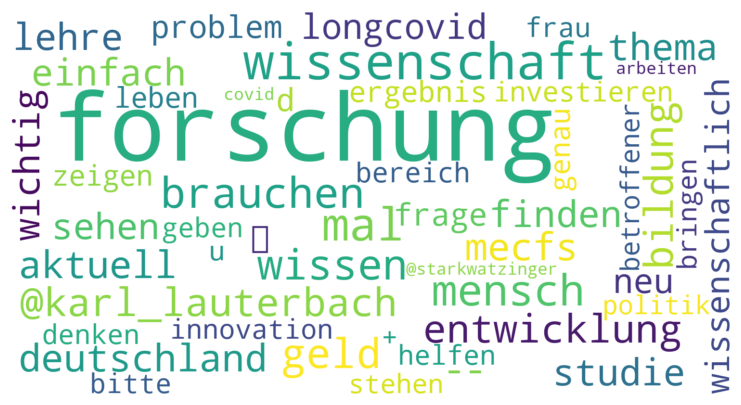

In [43]:
create_wordcloud(common_words_tweets)

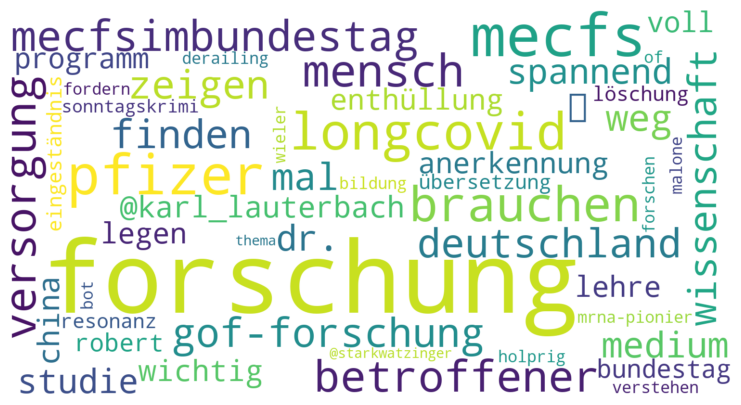

In [44]:
create_wordcloud(common_words_retweets)

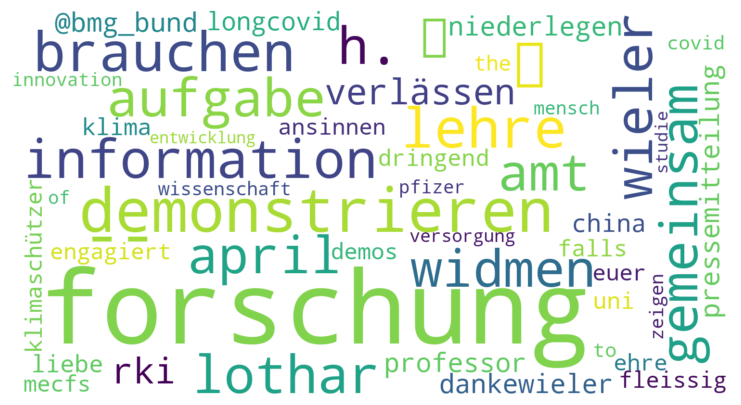

In [45]:
create_wordcloud(common_words_zitat_tweets)

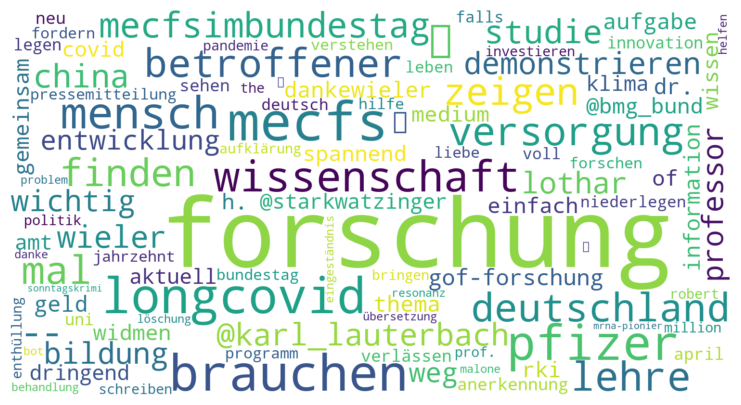

In [46]:
create_wordcloud(common_words_all)

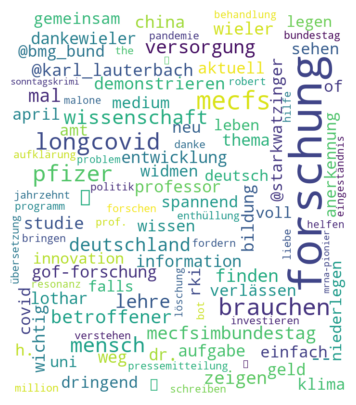

In [47]:
create_wordcloud_vertical(common_words_all)

#### Die häufigsten Wörter 2 - ohne Stoppwörter und Hashtags

In [48]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annalenahiergeist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
def common_words2(tweets):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()

    # Iteration über jeden Tweet
    for tweet in tweets:
        # Entfernen von Hashtags
        words = tweet.split()
        words = [word for word in words if not word.startswith('#')]

        # Wieder zusammenfügen zu einem String und Tokenisierung
        tweet = ' '.join(words)
        tokens = word_tokenize(tweet, language='german')

        # Filtern der Stoppwörter und Zählen
        words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
        word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [50]:
def common_words_all2(df):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()
    words = []
    names = ["tweet_text", "retweet_text_retweeted_tweet", "zitat_text"]
    for name in names:
           for tweet in df[name]:
               # Entfernen von Hashtags
                words = tweet.split()
                words = [word for word in words if not word.startswith('#')]
               
                # Wieder zusammenfügen zu einem String und Tokenisierung
                tweet = ' '.join(words)
                tokens = word_tokenize(tweet, language='german')

                # Filtern der Stoppwörter und Zählen
                words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
                word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [51]:
common_words_tweets2 = common_words2(tweets_annotiert['tweet_text'])
common_words_retweets2 = common_words2(tweets_annotiert['retweet_text_retweeted_tweet'])
common_words_zitat_tweets2 = common_words2(tweets_annotiert['zitat_text'])

In [52]:
common_words_all2 = common_words_all2(tweets_annotiert)

In [53]:
common_words_all2

word   freq
0       forschung  19637
1             die   4609
2             sie   3056
3             das   2685
4             wir   2604
..            ...    ...
95       resonanz    522
96  sonntagskrimi    519
97     löschungen    519
98      derailing    519
99       holprige    519

[100 rows x 2 columns]

In [54]:
common_words_tweets2

word  freq
0           forschung  7054
1                 die  1241
2                 das  1019
3                 sie   896
4                 ich   742
..                ...   ...
95            letzten   105
96              diese   104
97              geben   104
98  wissenschaftliche   103
99             helfen   103

[100 rows x 2 columns]

In [55]:
common_words_retweets2

word  freq
0   forschung  9551
1         die  2753
2         sie  1852
3         wir  1556
4          es  1391
..        ...   ...
95     manche   295
96   halbiert   294
97    pariser   294
98         am   291
99      viren   288

[100 rows x 2 columns]

In [56]:
common_words_zitat_tweets2

word  freq
0       forschung  3032
1             die   615
2           lehre   592
3   informationen   548
4              er   545
..            ...   ...
95     kernfusion   100
96          thema   100
97    betroffenen    99
98             by    97
99            our    95

[100 rows x 2 columns]

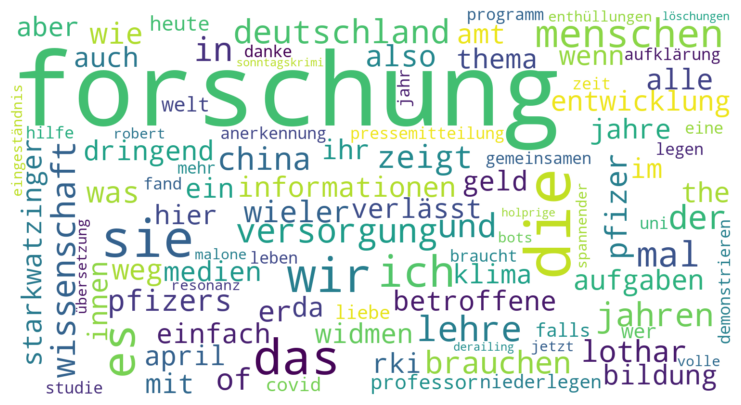

In [57]:
create_wordcloud(common_words_all2)

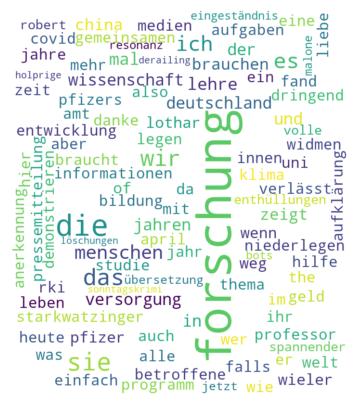

In [58]:
create_wordcloud_vertical(common_words_all2)

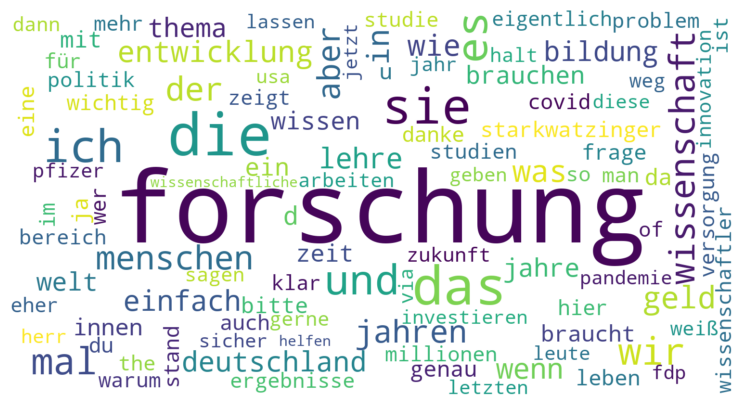

In [59]:
create_wordcloud(common_words_tweets2)

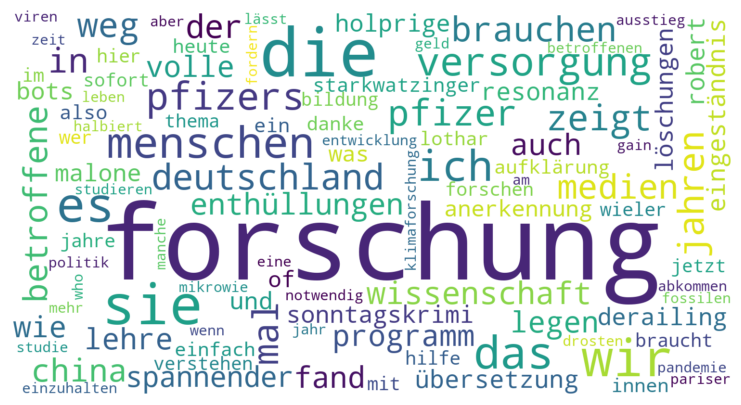

In [60]:
create_wordcloud(common_words_retweets2)

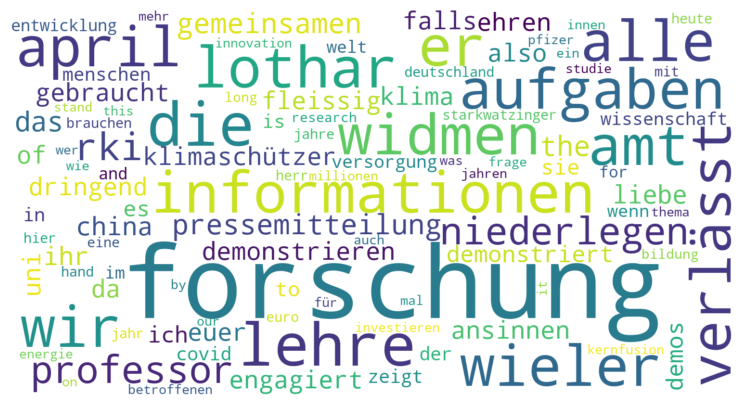

In [61]:
create_wordcloud(common_words_zitat_tweets2)

#### Häufigste Adjektive

In [62]:
def common_adjectives(df, name):
    adj_freq = Counter()
    for doc in df[f"spacy_doc_{name}"]:
        # Filtern nach Adjektiven und Zählen
        adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
        adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [63]:
adjectives_tweets = common_adjectives(tweets_annotiert, 'tweets')
adjectives_retweets = common_adjectives(tweets_annotiert, 'retweets')
adjectives_zitat_tweets = common_adjectives(tweets_annotiert, 'zitat_tweets')

In [64]:
adjectives_tweets

word  freq
0              neue   273
1             neuen   146
2            andere   125
3           anderen   122
4           weitere   105
..              ...   ...
95         mögliche    17
96          soziale    16
97      empirischer    16
98  biomedizinische    16
99        digitalen    16

[100 rows x 2 columns]

In [65]:
adjectives_retweets

word  freq
0                 volle   501
1              holprige   473
2                  neue   432
3                 neuen   388
4               pariser   294
..                  ...   ...
95              kleinen    40
96           staatliche    40
97  neuroimmunologische    40
98            wichtiger    39
99               stille    39

[100 rows x 2 columns]

In [66]:
adjectives_zitat_tweets

word  freq
0                 neuen   631
1           gemeinsamen   488
2                 liebe   371
3                  neue   171
4              nächsten    86
..                  ...   ...
95             daughter    13
96            digitalen    12
97              größten    12
98  neuroimmunologische    12
99            weltweite    12

[100 rows x 2 columns]

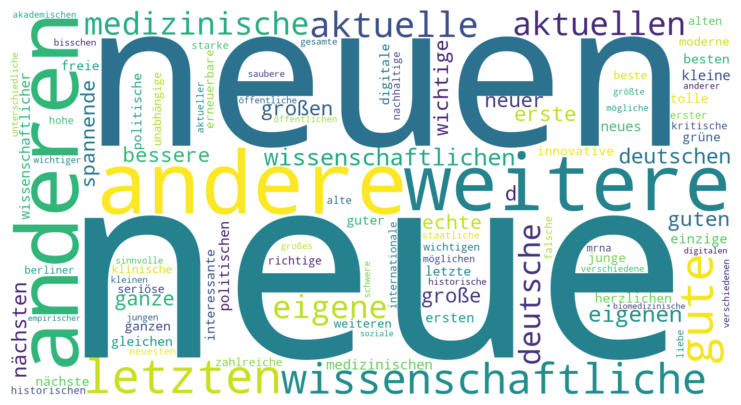

In [67]:
create_wordcloud(adjectives_tweets)

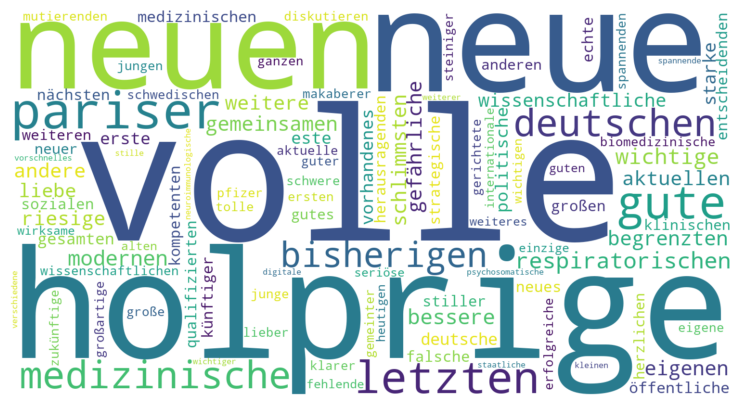

In [68]:
create_wordcloud(adjectives_retweets)

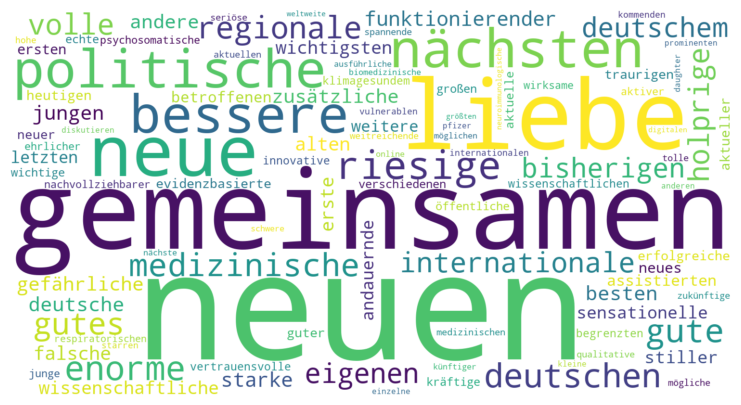

In [69]:
create_wordcloud(adjectives_zitat_tweets)

#### Häufigste Nomen 

In [70]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter

In [71]:
def filter_tokens2(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN"]

In [72]:
def common_nouns(df, name):
    nouns = []
    for doc in df[f"spacy_doc_{name}"]:
        nouns.extend(filter_tokens2(doc))

    noun_freq = Counter(nouns)
    sorted_noun_freq = noun_freq.most_common(50)
    
    common_nouns = pd.DataFrame(sorted_noun_freq, columns=["word", "freq"])

    return common_nouns

In [73]:
common_nouns_tweets = common_nouns(tweets_annotiert, 'tweets')
common_nouns_retweets = common_nouns(tweets_annotiert, 'retweets')
common_nouns_zitat_tweets = common_nouns(tweets_annotiert, 'zitat_tweets')

In [74]:
common_nouns_tweets

word  freq
0          forschung  7609
1       wissenschaft   586
2             mensch   435
3               geld   402
4            bildung   372
5        entwicklung   353
6              lehre   311
7              thema   309
8             studie   284
9            problem   217
10             frage   215
11          ergebnis   208
12           bereich   186
13              frau   174
14           politik   168
15       betroffener   165
16        innovation   164
17       technologie   160
18            wissen   158
19        versorgung   152
20   wissenschaftler   151
21              kind   148
22              welt   147
23             stand   146
24           projekt   145
25        geschichte   145
26           million   144
27              land   140
28             danke   139
29   @starkwatzinger   138
30           zukunft   132
31             leute   132
32        medikament   132
33              herr   131
34             leben   127
35           energie   127
36               dr.   124
37            arbeit   120
38        kernfusion   119
39            pfizer   119
40           medizin   117
41         jahrzehnt   116
42          therapie   111
43              fall   111
44  mecfsimbundestag   111
45        wirtschaft   109
46          forscher   107
47          pandemie   107
48              arzt   107
49           impfung   106

In [75]:
common_nouns_retweets

word   freq
0          forschung  10506
1             pfizer   1146
2             mensch   1132
3         versorgung   1037
4        betroffener   1012
5   mecfsimbundestag    979
6      gof-forschung    866
7       wissenschaft    758
8                dr.    665
9             medium    662
10            studie    572
11       anerkennung    551
12        enthüllung    549
13             lehre    538
14          programm    514
15         bundestag    493
16       übersetzung    481
17          resonanz    477
18          löschung    474
19     eingeständnis    474
20               bot    473
21           bildung    445
22             thema    436
23             hilfe    428
24        aufklärung    427
25                 🇪    417
26         jahrzehnt    416
27         professor    412
28       entwicklung    405
29              geld    391
30          pandemie    371
31       dankewieler    345
32             prof.    344
33   @starkwatzinger    336
34             danke    336
35           politik    324
36        behandlung    323
37    klimaforschung    303
38          ausstieg    295
39         ee-ausbau    295
40              arzt    294
41          abkommen    294
42           fossile    294
43            umgang    292
44           projekt    286
45           aufgabe    286
46       information    284
47        sars-cov-2    281
48          therapie    276
49        erkrankung    275

In [76]:
common_nouns_zitat_tweets

word  freq
0          forschung  3258
1              lehre   601
2        information   555
3            aufgabe   542
4                amt   520
5              april   508
6          professor   497
7        dankewieler   497
8                  ➡   490
9   pressemitteilung   489
10             klima   389
11               uni   376
12     klimaschützer   360
13          ansinnen   360
14              ehre   360
15      wissenschaft   251
16            mensch   225
17        versorgung   218
18            studie   205
19       entwicklung   187
20           bildung   181
21            pfizer   177
22  mecfsimbundestag   176
23              welt   164
24              herr   163
25              euro   160
26        kernfusion   157
27       betroffener   152
28            chance   149
29        innovation   146
30              hand   139
31   @starkwatzinger   132
32           energie   122
33         impfstoff   118
34       klimawandel   115
35             thema   114
36           million   109
37             stand   108
38             prof.   102
39        behandlung    99
40         bundestag    96
41         jahrzehnt    90
42              land    90
43               dr.    90
44             folge    90
45       anerkennung    90
46            fusion    89
47        aufklärung    87
48        ausbildung    87
49              auge    83

##### Wordclouds

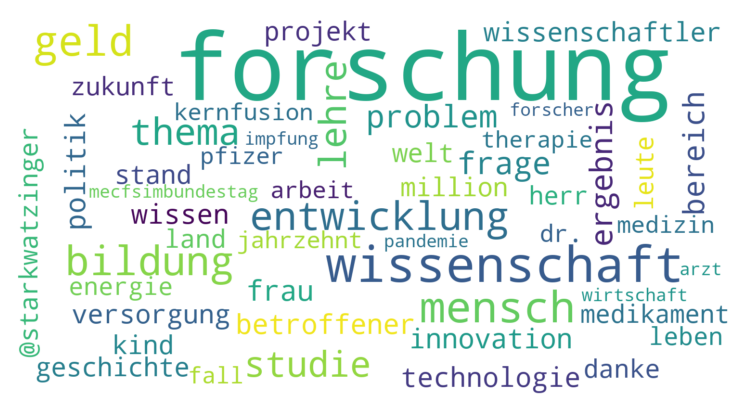

In [77]:
create_wordcloud(common_nouns_tweets)

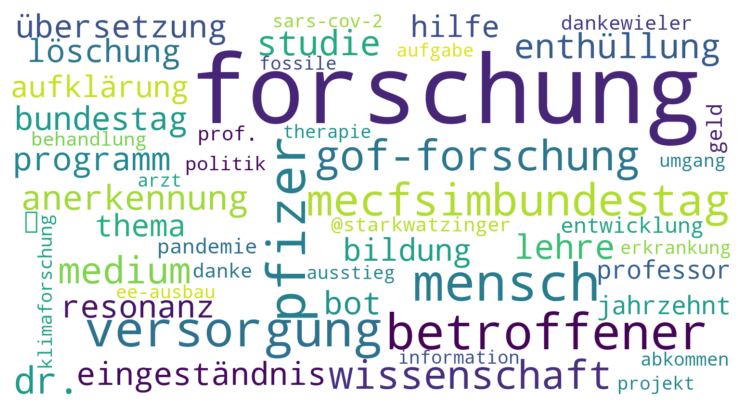

In [78]:
create_wordcloud(common_nouns_retweets)

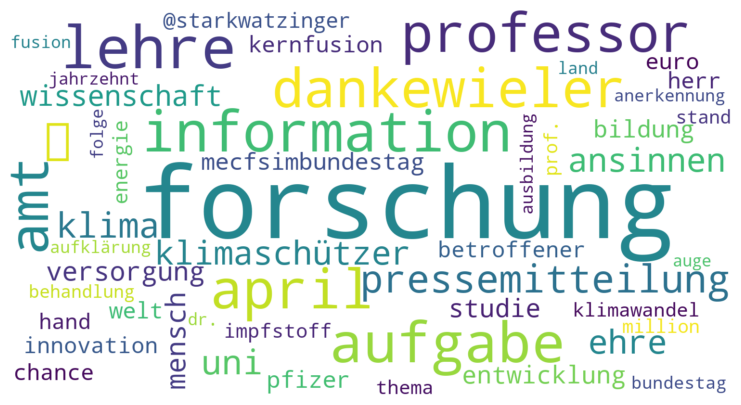

In [79]:
create_wordcloud(common_nouns_zitat_tweets)

### Häufigste Wörter in den Bios

In [80]:
def common_words_lemmas(lemmas_df):
    word_freq = Counter(lemmas_df)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [81]:
def get_lemmas_bios(df):
    lemmas = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        for token in row[f"spacy_doc_bios"]:
            if not token.is_punct and \
            not token.is_space and \
            not token.is_bracket and \
            not token.is_digit and \
            not token.is_quote and \
            not token.like_url and \
            not token.like_email:
                lemmas.append(token.lemma_)
    return lemmas

In [82]:
lemmas_bios = get_lemmas_bios(accounts_annotiert)
common_words_bios = common_words_lemmas(lemmas_bios)

  0%|          | 0/10818 [00:00<?, ?it/s]

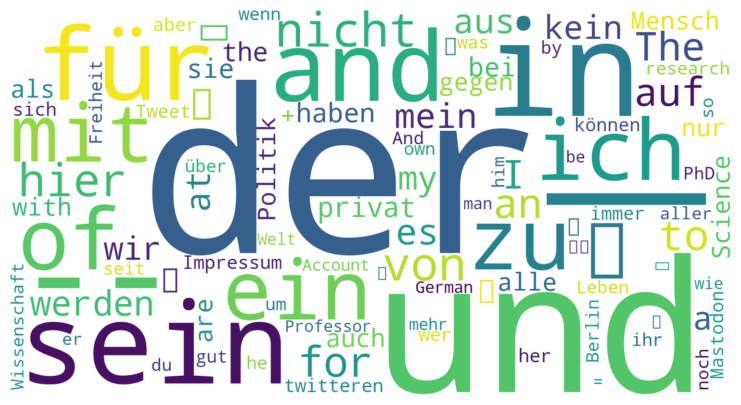

In [83]:
create_wordcloud(common_words_bios)

In [84]:
common_nouns_bios = common_nouns(accounts_annotiert, 'bios')
common_nouns_bios

word  freq
0              🇪   382
1              💉   249
2         mensch   191
3        politik   181
4      impressum   167
5       freiheit   143
6          leben   136
7          tweet   112
8   wissenschaft   112
9           welt   112
10     professor   109
11       meinung    95
12       account    90
13  gesellschaft    88
14      mitglied    84
15       student    77
16          kind    75
17    demokratie    73
18     forschung    72
19       bildung    70
20         thema    69
21        mutter    66
22    geschichte    65
23          team    63
24         musik    61
25    journalist    61
26          they    56
27    wirtschaft    55
28         vater    55
29           dr.    50
30    zustimmung    50
31    innovation    49
32         natur    49
33          nazi    49
34            he    47
35         sport    46
36   information    46
37           not    45
38    gesundheit    45
39         autor    44
40       frieden    44
41             🇮    44
42       twitter    43
43        medium    43
44   klimaschutz    43
45      wahrheit    43
46          mann    43
47        arbeit    43
48   datenschutz    42
49        kultur    42

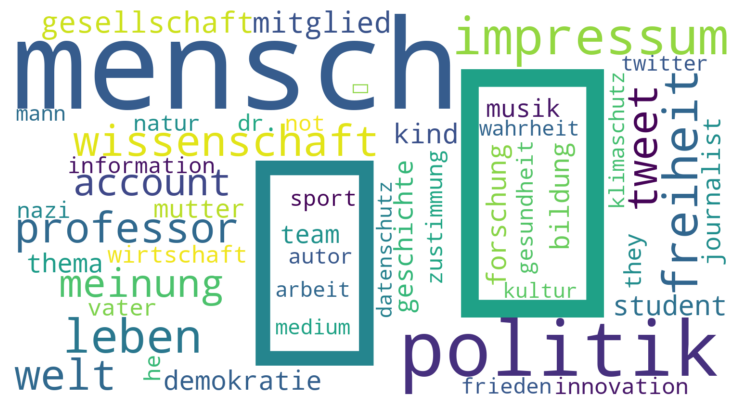

In [85]:
create_wordcloud(common_nouns_bios)

## Analyse der Hashtags

In [94]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [95]:
def count_hashtags_all(df):
    hashtags = []
    
    for index, row in df.iterrows():
        for column in ['tweet_text', 'retweet_text_retweeted_tweet', 'zitat_text']:
            hashtags.extend(re.findall(r'#\w+', str(row[column])))
    
    hashtags_counter = Counter(hashtags)
    
    top_n_hashtags = hashtags_counter.most_common(30)
    for hashtag, count in top_n_hashtags:
        print(f"{hashtag}: {count}")
    
    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtags_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#MECFS: 2155
#LongCovid: 1737
#Forschung: 1339
#MECFSimBundestag: 1106
#DankeWieler: 849
#PostVac: 377
#Wissenschaft: 364
#NichtGenesen: 307
#Pfizer: 265
#mecfs: 259
#Corona: 258
#MEcfs: 247
#postvac: 224
#Meinungsfreiheit: 219
#Zensur: 217
#Bildung: 213
#Berlin: 198
#Zukunftsstrategie: 188
#Kernfusion: 185
#Klimawandel: 183
#Impfschaeden: 182
#forschung: 167
#IchBinHanna: 151
#Bundestag: 146
#FDP: 145
#3K23: 144
#Luetzerath: 143
#COVID19: 141
#Longcovid: 137
#Innovation: 120


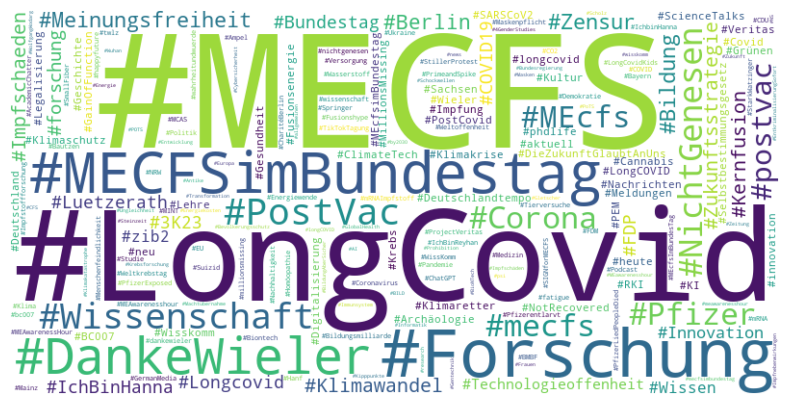

In [96]:
count_hashtags_all(tweets_annotiert)

In [97]:
def count_hashtags_seperate(df):
    hashtags_per_column = {'tweet_text': Counter(), 'retweet_text_retweeted_tweet': Counter(), 'zitat_text': Counter()}
    
    for index, row in df.iterrows():
        for column in hashtags_per_column:
            hashtags_per_column[column].update(re.findall(r'#\w+', str(row[column])))
    
    for column, hashtags_counter in hashtags_per_column.items():
        print(f"Top hashtags in {column}:")
        top_n_hashtags = hashtags_counter.most_common(20)
        for hashtag, count in top_n_hashtags:
            print(f"{hashtag}: {count}")
        print()

In [98]:
count_hashtags_seperate(tweets_annotiert)

Top hashtags in tweet_text:
#Forschung: 437
#MECFS: 240
#LongCovid: 197
#Wissenschaft: 127
#MECFSimBundestag: 104
#Bildung: 90
#forschung: 83
#Wissen: 80
#Geschichte: 75
#Nachrichten: 74
#Archäologie: 73
#Kultur: 73
#heute: 65
#aktuell: 64
#Meldungen: 61
#neu: 58
#mecfs: 57
#DankeWieler: 44
#phdlife: 37
#postvac: 33

Top hashtags in retweet_text_retweeted_tweet:
#MECFS: 1582
#LongCovid: 1187
#MECFSimBundestag: 854
#Forschung: 707
#PostVac: 333
#DankeWieler: 308
#NichtGenesen: 238
#Meinungsfreiheit: 211
#Zensur: 209
#MEcfs: 201
#Wissenschaft: 185
#postvac: 177
#Pfizer: 177
#Impfschaeden: 171
#mecfs: 155
#Corona: 136
#Berlin: 128
#Bundestag: 127
#Longcovid: 116
#FDP: 108

Top hashtags in zitat_text:
#DankeWieler: 497
#LongCovid: 353
#MECFS: 333
#Forschung: 195
#MECFSimBundestag: 148
#Klimawandel: 113
#Corona: 101
#Luetzerath: 93
#innovation: 85
#Klimaretter: 82
#ClimateTech: 82
#Zukunftsstrategie: 79
#Fusionsenergie: 73
#3K23: 70
#Pfizer: 65
#COVID19: 64
#DieZukunftGlaubtAnUns: 59
#Techn